# Deskewing without final rotation
The deskewing implementation in pyclesperanto is a combination of shearing and rotation in an affine transform. The resulting X-Y images form Z-planes in distal-proximal direction from the objective. This notebook demonstrates what happens when you turn of the rotation: the resulting stack becomes bigger. In order to run this notebook, you need to check out the 'deskew_without_rotation' branch of [pyclesperanto-prototype](https://github.com/clEsperanto/pyclesperanto_prototype).

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle
import numpy as np

cle.get_device()

<gfx1035 on Platform: AMD Accelerated Parallel Processing (2 refs)>

In [2]:
voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30

The example image data shown below was kindly provided by 
[Ms Cindy Evelyn](https://imaging.wehi.edu.au/about-us/niall-geoghegan) and [Dr Niall Geoghegan](https://imaging.wehi.edu.au/about-us/niall-geoghegan) from the [Centre for Dynamic Imaging, WEHI, Melbourne, Australia](https://imaging.wehi.edu.au/) who used lattice light sheet microscopy to capture red blood cells and study the [malaria parasite invasion process](https://www.nature.com/articles/s41467-021-23626-7). The data is acquired using a Zeiss lattice lightsheet microscope.

In [3]:
original_image = imread('../../data/RBC_tiny.tif')

When looking at this image stack from the side, one can see the tilt of the light sheet orientation. The angle is typically about 30 degrees and this is also the same angle we use at the very end to rotate the stack after shearing.

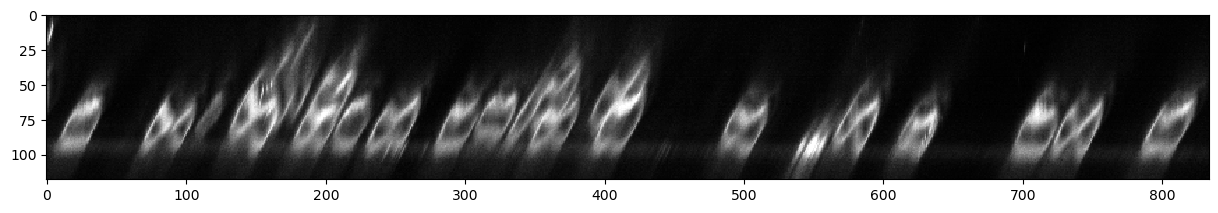

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(15,15))

cle.imshow(original_image[:,:,100].T, plot=axs)

## Deskewing including rotation
When we deskew this image and take a look in the X-Z plane, we get this view: 

In [5]:
deskewed = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns)

deskewed.shape

(59, 1828, 209)

In [6]:
print("This image is", int(np.prod(deskewed.shape) * 2 * 2 / 1024 / 1024), "MB large")

This image is 85 MB large


The resulting image has a quite different size because the image stack is not just sheared, it is also rotated in a way that the Z-planes of the resulting image stack correspond to an orientation that the Z-axis goes in proximal-distal orientation from the objective. As if we hat acquired an image using a confocal microscope. 

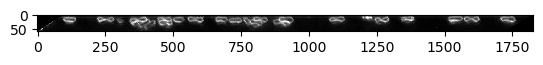

In [7]:
cle.imshow(deskewed[:,:,100])

## Deskewing without rotation

In [8]:
deskewed = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        apply_final_rotation=False)

deskewed.shape

(863, 1612, 209)

In [9]:
print("This image is", int(np.prod(deskewed.shape) * 2 * 2 / 1024 / 1024), "MB large")

This image is 1109 MB large


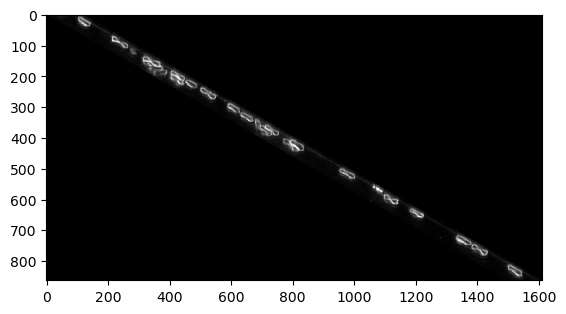

In [10]:
cle.imshow(deskewed[:,:,100])